# 1. PBMC data of immune cells from young and old, male and female samples

Huang, Zhaohao, Binyao Chen, Xiuxing Liu, He Li, Lihui Xie, Yuehan Gao, Runping Duan, et al. 2021. “Effects of Sex and Aging on the Immune Cell Landscape as Assessed by Single-Cell Transcriptomic Analysis.” Proceedings of the National Academy of Sciences of the United States of America 118 (33). https://doi.org/10.1073/pnas.2023216118.

In [1]:
import os
import sys
import pandas as pd

# Scanpro functions
from scanpro import scanpro
from scanpro.utils import convert_counts_to_df

In [2]:
# path where figures are going to be saved
FIG_PATH = 'plots'

------------------

## Read data

In [3]:
pbmc_counts = pd.read_csv("data/pbmc_counts.tsv", sep="\t")

In [4]:
pbmc_counts.head()

Sample Condition     Sex  Age  B cells  Dendritic cells  Monocytes  \
0    OF1        OF  Female  Old     1449              135       1342   
1    OF2        OF  Female  Old      677              148       2159   
2    OF3        OF  Female  Old      552              124       1507   
3    OF4        OF  Female  Old      666              146       1277   
4    OF5        OF  Female  Old      653              137       2027   

   NK cells  T cells  
0      1328     4574  
1       746     5097  
2      1108     5535  
3       589     6151  
4      1632     4379

In [5]:
# Convert count matrix to long format
pbmc = convert_counts_to_df(pbmc_counts, column_name="Celltype")
pbmc.head()

Sample Condition     Sex  Age Celltype
cell_1    OF1        OF  Female  Old  B cells
cell_2    OF1        OF  Female  Old  B cells
cell_3    OF1        OF  Female  Old  B cells
cell_4    OF1        OF  Female  Old  B cells
cell_5    OF1        OF  Female  Old  B cells

-------

## Run Scanpro

### Young vs Old

In [6]:
pbmc_young_old = scanpro(pbmc, samples_col='Sample', clusters_col='Celltype', conds_col='Age')
pbmc_young_old.results

[INFO] There are 2 conditions. T-Test will be performed...
[INFO] Done!


baseline_props  mean_props_Old  mean_props_Young  prop_ratio  \
clusters                                                                        
B cells                0.098383        0.094222          0.102401    0.920131   
Dendritic cells        0.017112        0.016362          0.018018    0.908097   
Monocytes              0.171416        0.196655          0.143211    1.373180   
NK cells               0.146479        0.158121          0.133477    1.184627   
T cells                0.566610        0.534640          0.602892    0.886791   

                 t_statistics  p_values  adjusted_p_values  
clusters                                                    
B cells             -0.820489  0.415800           0.519750  
Dendritic cells     -0.251112  0.802748           0.802748  
Monocytes            2.608123  0.011948           0.059738  
NK cells             1.081533  0.284606           0.474344  
T cells             -1.780506  0.081019           0.202548

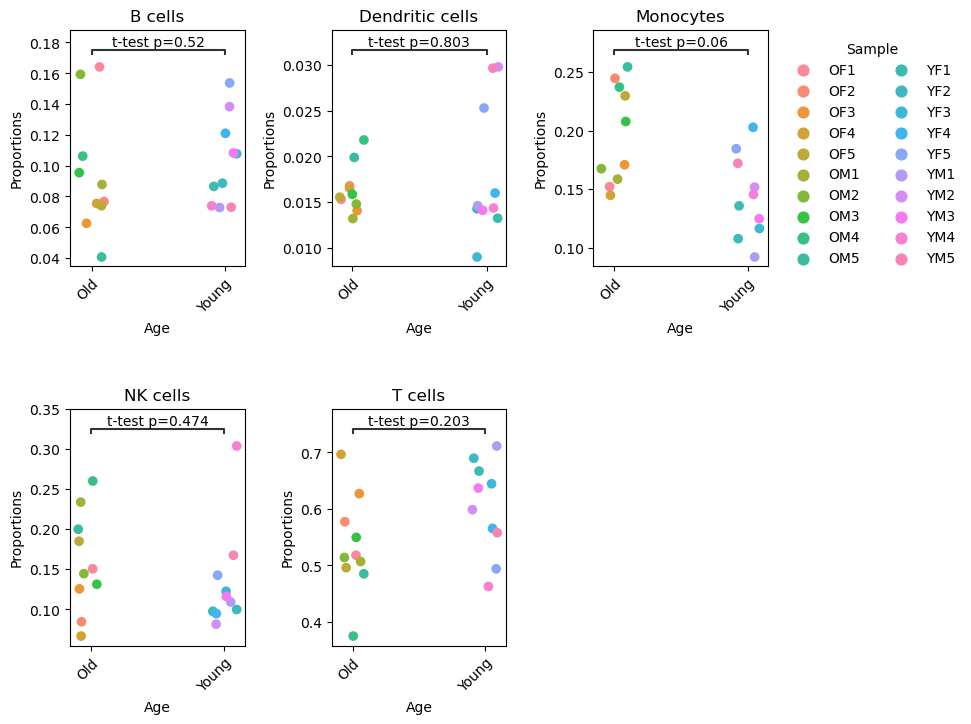

In [7]:
pbmc_young_old.plot(save="plots/pbmc_age_stripplot.pdf")

#### With sex as covariate

In [8]:
pbmc_young_old_sex = scanpro(pbmc, samples_col='Sample', clusters_col='Celltype', conds_col='Age', 
                             covariates=["Sex"])
pbmc_young_old_sex.results

[INFO] There are 2 conditions. T-Test will be performed...
[INFO] Done!


baseline_props  mean_props_Old  mean_props_Young  prop_ratio  \
clusters                                                                        
B cells                0.098383        0.094222          0.102401    0.920131   
Dendritic cells        0.017112        0.016362          0.018018    0.908097   
Monocytes              0.171416        0.196655          0.143211    1.373180   
NK cells               0.146479        0.158121          0.133477    1.184627   
T cells                0.566610        0.534640          0.602892    0.886791   

                 t_statistics  p_values  adjusted_p_values  
clusters                                                    
B cells             -0.847305  0.399205           0.499006  
Dendritic cells     -0.240203  0.810751           0.810751  
Monocytes            2.446304  0.016494           0.082471  
NK cells             1.220507  0.225648           0.376080  
T cells             -1.782987  0.078158           0.195396

### Male vs Female

In [9]:
pbmc_male_female = scanpro(pbmc, samples_col='Sample', clusters_col='Celltype', conds_col='Sex')
pbmc_male_female.results.to_csv("results/pbmc_scanpro_rep_logit.tsv", sep="\t")
pbmc_male_female.results

[INFO] There are 2 conditions. T-Test will be performed...
[INFO] Done!


baseline_props  mean_props_Female  mean_props_Male  \
clusters                                                              
B cells                0.098383           0.101042         0.095581   
Dendritic cells        0.017112           0.015587         0.018793   
Monocytes              0.171416           0.168821         0.171046   
NK cells               0.146479           0.116914         0.174684   
T cells                0.566610           0.597636         0.539896   

                 prop_ratio  t_statistics  p_values  adjusted_p_values  
clusters                                                                
B cells            1.057138      0.453598  0.651210           0.814013  
Dendritic cells    0.829422     -1.054917  0.294287           0.490479  
Monocytes          0.986995     -0.063599  0.949430           0.949430  
NK cells           0.669285     -2.636203  0.009874           0.049371  
T cells            1.106946      1.447690  0.151178           0.377946

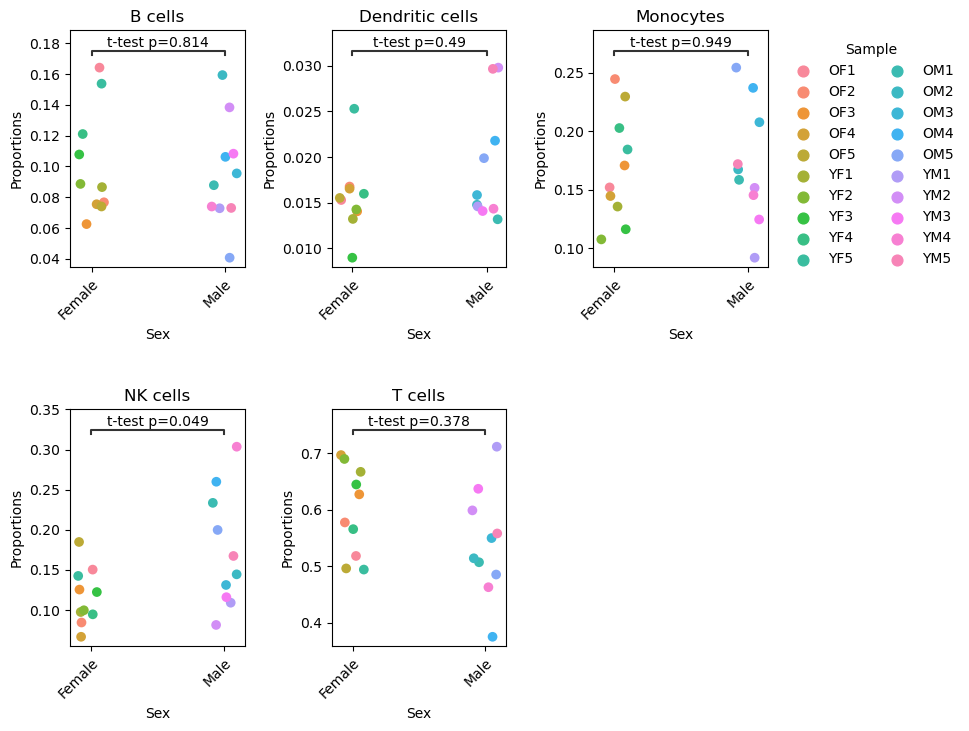

In [10]:
pbmc_male_female.plot(save=f"{FIG_PATH}/pbmc_sex_stripplot.pdf")

In [11]:
pbmc_male_female_arcsin = scanpro(pbmc, samples_col='Sample', clusters_col='Celltype', conds_col='Sex', transform="arcsin")
pbmc_male_female_arcsin.results.to_csv("results/pbmc_scanpro_rep_arcsin.tsv", sep="\t")

[INFO] There are 2 conditions. T-Test will be performed...
[INFO] Done!


In [12]:
pbmc_male_female_arcsin.results

baseline_props  mean_props_Female  mean_props_Male  \
clusters                                                              
B cells                0.098383           0.101042         0.095581   
Dendritic cells        0.017112           0.015587         0.018793   
Monocytes              0.171416           0.168821         0.171046   
NK cells               0.146479           0.116914         0.174684   
T cells                0.566610           0.597636         0.539896   

                 prop_ratio  t_statistics  p_values  adjusted_p_values  
clusters                                                                
B cells            1.057138      0.390929  0.699921           0.874901  
Dendritic cells    0.829422     -1.107839  0.280882           0.468136  
Monocytes          0.986995     -0.089650  0.929443           0.929443  
NK cells           0.669285     -2.356287  0.028605           0.143026  
T cells            1.106946      1.547036  0.137298           0.343246

#### With age as covariate

In [13]:
pbmc_male_female_age = scanpro(pbmc, samples_col='Sample', clusters_col='Celltype', conds_col='Sex',
                               covariates="Age")
pbmc_male_female_age.results

[INFO] There are 2 conditions. T-Test will be performed...
[INFO] Done!


baseline_props  mean_props_Female  mean_props_Male  \
clusters                                                              
B cells                0.098383           0.101042         0.095581   
Dendritic cells        0.017112           0.015587         0.018793   
Monocytes              0.171416           0.168821         0.171046   
NK cells               0.146479           0.116914         0.174684   
T cells                0.566610           0.597636         0.539896   

                 prop_ratio  t_statistics  p_values  adjusted_p_values  
clusters                                                                
B cells            1.057138      0.466193  0.642270           0.802838  
Dendritic cells    0.829422     -1.094385  0.276878           0.461463  
Monocytes          0.986995     -0.066020  0.947517           0.947517  
NK cells           0.669285     -2.699387  0.008380           0.041900  
T cells            1.106946      1.496382  0.138258           0.345645

In [14]:
pbmc_male_female_age_arcsin = scanpro(pbmc, samples_col='Sample', clusters_col='Celltype', conds_col='Sex',
                                      covariates="Age", transform='arcsin')
pbmc_male_female_age_arcsin.results

[INFO] There are 2 conditions. T-Test will be performed...
[INFO] Done!


baseline_props  mean_props_Female  mean_props_Male  \
clusters                                                              
B cells                0.098383           0.101042         0.095581   
Dendritic cells        0.017112           0.015587         0.018793   
Monocytes              0.171416           0.168821         0.171046   
NK cells               0.146479           0.116914         0.174684   
T cells                0.566610           0.597636         0.539896   

                 prop_ratio  t_statistics  p_values  adjusted_p_values  
clusters                                                                
B cells            1.057138      0.386739  0.703138           0.878923  
Dendritic cells    0.829422     -1.081364  0.292729           0.487882  
Monocytes          0.986995     -0.106908  0.915955           0.915955  
NK cells           0.669285     -2.372052  0.028114           0.140572  
T cells            1.106946      1.658676  0.113182           0.282954

## Run Scanpro without replicates

### Male vs Female

In [15]:
pbmc_male_female_norep = scanpro(pbmc, clusters_col='Celltype', conds_col='Sex')
pbmc_male_female_norep.results.to_csv("results/pbmc_scanpro_norep_logit.tsv", sep="\t")

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[WARNING] Consider setting transform='arcsin', as this produces more accurate results for simulated data.
[INFO] Simulation may take some minutes...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 37.22 seconds


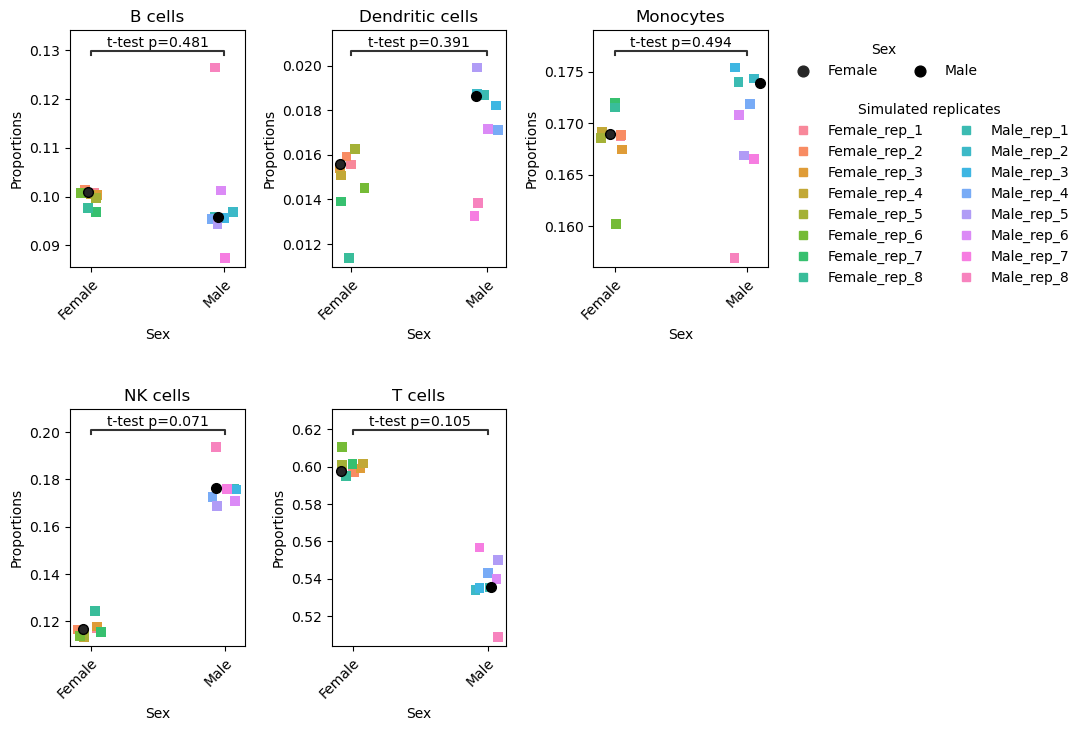

In [16]:
pbmc_male_female_norep.plot(save="plots/pbmc_sex_norep_stripplot.pdf")

In [17]:
pbmc_male_female_norep_arcsin = scanpro(pbmc, clusters_col='Celltype', conds_col='Sex', transform="arcsin")
pbmc_male_female_norep_arcsin.results.to_csv("results/pbmc_scanpro_norep_arcsin.tsv", sep="\t")

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[INFO] Simulation may take some minutes...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 36.77 seconds


In [18]:
pbmc_male_female_norep_arcsin.results

baseline_props  mean_props_Female  mean_props_Male  p_values
clusters                                                                     
B cells                0.098383           0.100009         0.093747  0.514445
Dendritic cells        0.017112           0.014783         0.017355  0.501274
Monocytes              0.171416           0.168843         0.171865  0.529536
NK cells               0.146479           0.116939         0.175939  0.028656
T cells                0.566610           0.598181         0.536141  0.051923

#### with age as covariate

In [19]:
pbmc_male_female_norep_age = scanpro(pbmc, clusters_col='Celltype', conds_col='Sex', covariates=["Age"])
pbmc_male_female_norep_age.results

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[WARNING] Consider setting transform='arcsin', as this produces more accurate results for simulated data.
[INFO] Simulation may take some minutes...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 42.03 seconds


baseline_props  mean_props_Female  mean_props_Male  p_values
clusters                                                                     
B cells                0.098383           0.100601         0.094723  0.527858
Dendritic cells        0.017112           0.015092         0.017631  0.528302
Monocytes              0.171416           0.167636         0.173229  0.565368
NK cells               0.146479           0.115993         0.176193  0.169186
T cells                0.566610           0.598968         0.535534  0.130130

In [20]:
pbmc_male_female_norep_cov = scanpro(pbmc, clusters_col='Celltype', conds_col='Sex', covariates="Age", transform="arcsin")
pbmc_male_female_norep_cov.results

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[INFO] Simulation may take some minutes...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 41.98 seconds


baseline_props  mean_props_Female  mean_props_Male  p_values
clusters                                                                     
B cells                0.098383           0.100601         0.094723  0.612096
Dendritic cells        0.017112           0.015092         0.017631  0.612096
Monocytes              0.171416           0.167636         0.173229  0.602256
NK cells               0.146479           0.115993         0.176193  0.026844
T cells                0.566610           0.598968         0.535534  0.071979

-----------------------

## Run propeller

In [21]:
# Setup path to R
R_home = os.path.dirname(sys.executable)[:-4] + "/lib/R"
os.environ["R_HOME"] = R_home
%load_ext rpy2.ipython

In [22]:
%%R -i pbmc -o propeller_results_logit -o propeller_results_arcsin
library(speckle)

propeller_results_logit = propeller(clusters = pbmc$Celltype, sample = pbmc$Sample, group = pbmc$Sex, transform="logit")
propeller_results_arcsin = propeller(clusters = pbmc$Celltype, sample = pbmc$Sample, group = pbmc$Sex, transform="asin")


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

Performing logit transformation of proportions
group variable has 2 levels, t-tests will be performed
Performing arcsin square root transformation of proportions
group variable has 2 levels, t-tests will be performed


In [23]:
propeller_results_logit

BaselineProp.clusters  BaselineProp.Freq  PropMean.Female  \
NK cells                     NK cells           0.146479         0.116914   
T cells                       T cells           0.566610         0.597636   
Dendritic cells       Dendritic cells           0.017112         0.015587   
B cells                       B cells           0.098383         0.101042   
Monocytes                   Monocytes           0.171416         0.168821   

                 PropMean.Male  PropRatio  Tstatistic   P.Value       FDR  
NK cells              0.174684   0.669285   -2.637317  0.009844  0.049221  
T cells               0.539896   1.106946    1.448420  0.150975  0.377437  
Dendritic cells       0.018793   0.829422   -1.052536  0.295371  0.492285  
B cells               0.095581   1.057138    0.453546  0.651248  0.814059  
Monocytes             0.171046   0.986995   -0.063694  0.949355  0.949355

In [24]:
propeller_results_logit.to_csv("results/pbmc_propeller_rep_logit.tsv", sep="\t")
propeller_results_arcsin.to_csv("results/pbmc_propeller_rep_arcsin.tsv", sep="\t")

-------------

## Run scCODA

### Data preparation

In [25]:
import pertpy as pt
import anndata as ad

In [26]:
sccoda_adata = ad.AnnData(obs=pbmc)

### With replicates

In [27]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(sccoda_adata, type="cell_level", generate_sample_level=True, cell_type_identifier="Celltype", 
                                sample_identifier="Sample", covariate_obs=["Sex"])
sccoda_data = sccoda_model.prepare(sccoda_data, modality_key="coda", formula="Sex", reference_cell_type="Monocytes")

<Axes: xlabel='Cell type', ylabel='Proportion'>

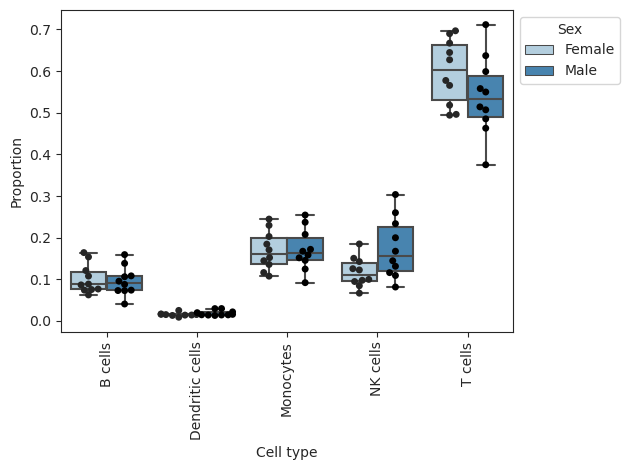

In [28]:
pt.pl.coda.boxplots(sccoda_data, modality_key="coda", feature_name="Sex", add_dots=True)

In [29]:
sccoda_model.run_nuts(sccoda_data, modality_key="coda")

sample: 100%|██████████| 11000/11000 [00:47<00:00, 231.79it/s, 63 steps of size 4.41e-02. acc. prob=0.73] 


In [30]:
sccoda_model.summary(sccoda_data, modality_key="coda")

                                          Compositional Analysis summary                                           
┌─────────────────────────────────────────────┬───────────────────────────────────────────────────────────────────┐
│ Name                                        │ Value                                                             │
├─────────────────────────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Data                                        │ Data: 20 samples, 5 cell types                                    │
│ Reference cell type                         │ Monocytes                                                         │
│ Formula                                     │ Sex                                                               │
└─────────────────────────────────────────────┴───────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                  Final Parameter  Expected Sample                                                               │
│ Cell Type                                                                                                       │
│ B cells              1.869            868.095                                                                   │
│ Dendritic cells      0.393            198.403                                                                   │
│ Monocytes            2.394           1467.479                                                                   │
│ NK cells             2.112           1106.881                                                                   │
│ T cells              3.636           5081.192                                                                   │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                            Final Parameter  Expected Sample  log2-fold change                                   │
│ Covariate Cell Type                                                                                             │
│ SexT.Male B cells              0.000            868.095           0.000                                         │
│           Dendritic cells      0.000            198.403           0.000                                         │
│           Monocytes            0.000           1467.479           0.000                                         │
│           NK cells             0.000           1106.881           0.000                                         │
│           T cells              0.000           5081.192           0.000                                         │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [31]:
# Get credible effects at different FDR levels:
credible_effects_list = []
for fdr in [0.01,0.05,0.1,0.2,0.3,0.4]:
    sccoda_model.set_fdr(sccoda_data, modality_key="coda", est_fdr=fdr)
    
    credible_effects_table = sccoda_model.credible_effects(sccoda_data, modality_key="coda").to_frame(name="credible_effect")
    credible_effects_table["fdr"] = fdr
    credible_effects_list.append(credible_effects_table)

credible_effects = pd.concat(credible_effects_list)
credible_effects

credible_effect   fdr
Covariate   Cell Type                             
Sex[T.Male] B cells                    False  0.01
            Dendritic cells            False  0.01
            Monocytes                  False  0.01
            NK cells                   False  0.01
            T cells                    False  0.01
            B cells                    False  0.05
            Dendritic cells            False  0.05
            Monocytes                  False  0.05
            NK cells                   False  0.05
            T cells                    False  0.05
            B cells                    False  0.10
            Dendritic cells            False  0.10
            Monocytes                  False  0.10
            NK cells                   False  0.10
            T cells                    False  0.10
            B cells                    False  0.20
            Dendritic cells            False  0.20
            Monocytes                  False  0.20
            NK cells                   False  0.20
            T cells                    False  0.20
            B cells                    False  0.30
            Dendritic cells            False  0.30
            Monocytes                  False  0.30
            NK cells                    True  0.30
            T cells                    False  0.30
            B cells                    False  0.40
            Dendritic cells            False  0.40
            Monocytes                  False  0.40
            NK cells                    True  0.40
            T cells                     True  0.40

In [32]:
credible_effects.to_csv("results/pbmc_sccoda_rep.tsv", sep="\t")

### Without replicates

In [33]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(sccoda_adata, type="cell_level", generate_sample_level=True, cell_type_identifier="Celltype", 
                                sample_identifier="Sex", covariate_obs=["Sex"])
sccoda_data = sccoda_model.prepare(sccoda_data, modality_key="coda", formula="Sex", reference_cell_type="Monocytes")

In [34]:
sccoda_model.run_nuts(sccoda_data, modality_key="coda")

sample: 100%|██████████| 11000/11000 [00:14<00:00, 772.23it/s, 63 steps of size 4.35e-02. acc. prob=0.71] 


In [35]:
sccoda_model.summary(sccoda_data, modality_key="coda")

                                          Compositional Analysis summary                                           
┌──────────────────────────────────────────────┬──────────────────────────────────────────────────────────────────┐
│ Name                                         │ Value                                                            │
├──────────────────────────────────────────────┼──────────────────────────────────────────────────────────────────┤
│ Data                                         │ Data: 2 samples, 5 cell types                                    │
│ Reference cell type                          │ Monocytes                                                        │
│ Formula                                      │ Sex                                                              │
└──────────────────────────────────────────────┴──────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                  Final Parameter  Expected Sample                                                               │
│ Cell Type                                                                                                       │
│ B cells              3.365           8632.177                                                                   │
│ Dendritic cells      1.621           1509.075                                                                   │
│ Monocytes            3.917          14991.700                                                                   │
│ NK cells             3.635          11307.845                                                                   │
│ T cells              5.137          50779.703                                                                   │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                            Final Parameter  Expected Sample  log2-fold change                                   │
│ Covariate Cell Type                                                                                             │
│ SexT.Male B cells              0.000           8632.177           0.000                                         │
│           Dendritic cells      0.000           1509.075           0.000                                         │
│           Monocytes            0.000          14991.700           0.000                                         │
│           NK cells             0.000          11307.845           0.000                                         │
│           T cells              0.000          50779.703           0.000                                         │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [36]:
# Get credible effects at different FDR levels:
credible_effects_list = []
for fdr in [0.01,0.05,0.1,0.2,0.3,0.4]:
    sccoda_model.set_fdr(sccoda_data, modality_key="coda", est_fdr=fdr)
    
    credible_effects_table = sccoda_model.credible_effects(sccoda_data, modality_key="coda").to_frame(name="credible_effect")
    credible_effects_table["fdr"] = fdr
    credible_effects_list.append(credible_effects_table)

credible_effects = pd.concat(credible_effects_list)
credible_effects

credible_effect   fdr
Covariate   Cell Type                             
Sex[T.Male] B cells                    False  0.01
            Dendritic cells            False  0.01
            Monocytes                  False  0.01
            NK cells                   False  0.01
            T cells                    False  0.01
            B cells                    False  0.05
            Dendritic cells            False  0.05
            Monocytes                  False  0.05
            NK cells                   False  0.05
            T cells                    False  0.05
            B cells                    False  0.10
            Dendritic cells            False  0.10
            Monocytes                  False  0.10
            NK cells                   False  0.10
            T cells                    False  0.10
            B cells                    False  0.20
            Dendritic cells            False  0.20
            Monocytes                  False  0.20
            NK cells                   False  0.20
            T cells                    False  0.20
            B cells                    False  0.30
            Dendritic cells            False  0.30
            Monocytes                  False  0.30
            NK cells                   False  0.30
            T cells                    False  0.30
            B cells                    False  0.40
            Dendritic cells            False  0.40
            Monocytes                  False  0.40
            NK cells                    True  0.40
            T cells                    False  0.40

In [37]:
credible_effects.to_csv("results/pbmc_sccoda_norep.tsv", sep="\t")